In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [101]:
X,y=make_blobs(1000, centers=4, random_state=42)

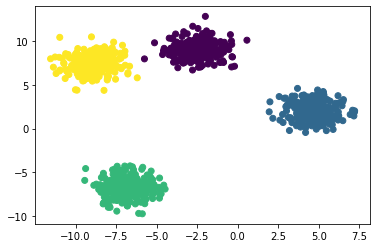

In [102]:
plt.scatter(X[:,0],X[:,1],c=y)

In [103]:
ohe = OneHotEncoder(categories="auto")

In [104]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [105]:
ohe.categories_


[array([0, 1, 2, 3])]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [107]:
hidden = Dense(5, activation="relu", input_shape=(2,))
out = Dense(4, activation="softmax")

In [108]:
model = Sequential()
model.add(hidden)
model.add(out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [110]:
model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
670/670 [==============================] - 0s 704us/step - loss: 3.1202 - acc: 0.0030
Epoch 2/50
670/670 [==============================] - 0s 19us/step - loss: 3.0504 - acc: 0.0030
Epoch 3/50
670/670 [==============================] - 0s 21us/step - loss: 2.9764 - acc: 0.0030
Epoch 4/50
670/670 [==============================] - 0s 19us/step - loss: 2.9041 - acc: 0.0030
Epoch 5/50
670/670 [==============================] - 0s 16us/step - loss: 2.8305 - acc: 0.0030
Epoch 6/50
670/670 [==============================] - 0s 18us/step - loss: 2.7589 - acc: 0.0000e+00
Epoch 7/50
670/670 [==============================] - 0s 16us/step - loss: 2.6901 - acc: 0.0000e+00
Epoch 8/50
670/670 [==============================] - 0s 19us/step - loss: 2.6241 - acc: 0.0000e+00
Epoch 9/50
670/670 [==============================] - 0s 18us/step - loss: 2.5579 - acc: 0.0000e+00
Epoch 10/50
670/670 [==============================] - 0s 16us/step - loss: 2.4951 - acc: 0.0000e+00
Epoch 11/50
670/67

In [111]:
model.evaluate(X_test, y_test)

330/330 [==============================] - 0s 479us/step


[1.1531987956075958, 0.36363636435884417]

In [112]:
model.predict(X_test[:1])

array([[0.2039423 , 0.1321664 , 0.16114125, 0.50275   ]], dtype=float32)

In [113]:
y_test[:1]

matrix([[0., 1., 0., 0.]])